In [18]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
img = torch.rand(size=(3, 224,224)) *256 - 128

In [78]:
def plot_1d_arrays(arrays: list):
    n = len(arrays)

    grid_size = int(np.ceil(np.sqrt(n)))

    fig, axes = plt.subplots(int(np.ceil(n/grid_size)), grid_size, figsize=(10, 10))
    if n > 1:
        axes_flat = axes.flatten()
    else:
        axes_flat = [axes]
        
    for i, image in enumerate(arrays):
        if i < n:
            ax = axes_flat[i]
            im = ax.imshow(convert_array_shape(image), cmap='gray')
            ax.axis('off')
            fig.colorbar(im, ax=ax)
        else:
            axes_flat[i].axis('off')

    plt.tight_layout()
    plt.show()

def convert_array_shape(arr):
    # Transpose the array to change its shape
    return np.transpose(arr, (1, 2, 0))

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, (11,11), stride=4)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d((3,3), stride=2)
        self.conv2 = nn.Conv2d(96, 256, (5,5), padding=2)
        self.conv3 = nn.Conv2d(256, 384, (3,3), padding=1)
        self.conv4 = nn.Conv2d(384, 384, (3,3), padding=1)
        self.conv5 = nn.Conv2d(384, 256, (3,3), padding=1)
        self.fc1 = nn.Linear(6400, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)
        self.drop = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool1(x)

        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool1(x)

        x = torch.flatten(x)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        x = self.fc3(x)
        x = self.drop(x)
        
        return x
    




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1000])


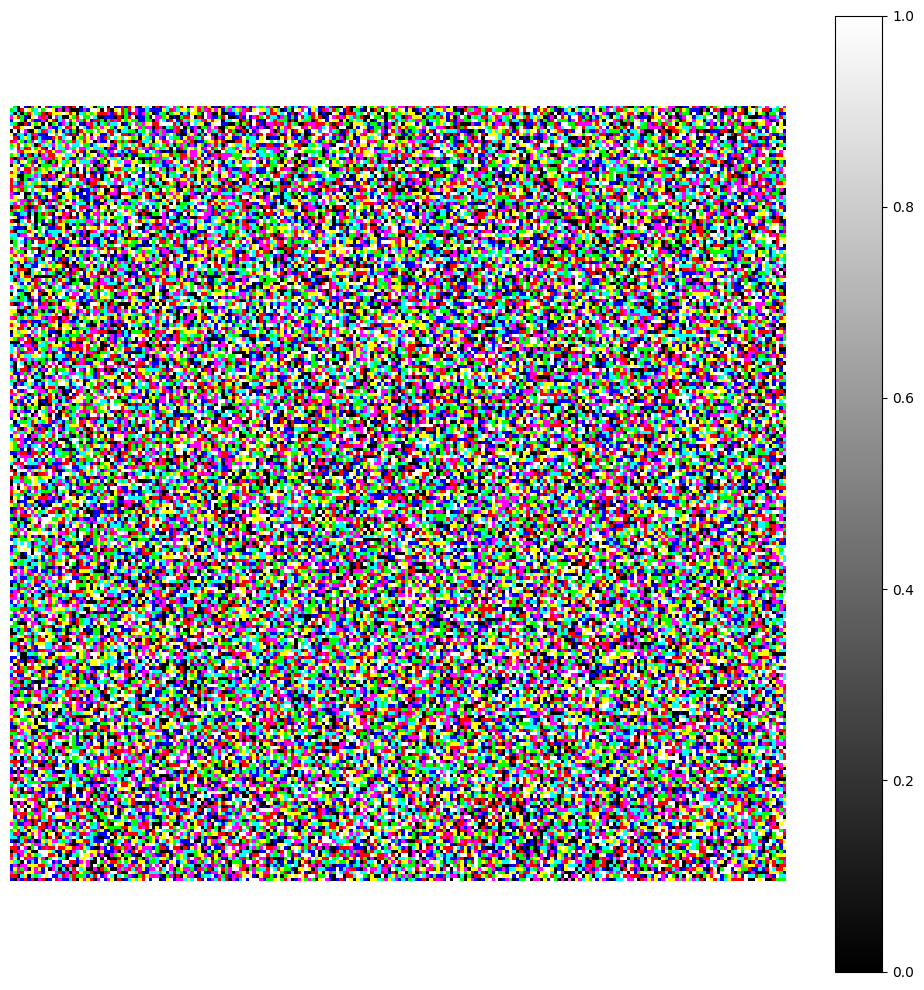

In [79]:
model = AlexNet()
result = model(img)
print(result.shape)
plot_1d_arrays([img])
# print(model(img))
# print(model(img).shape)
